In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from matplotlib.patches import Circle
from matplotlib import patches, patheffects

In [3]:
torch.cuda.set_device(0)

In [7]:
PATH = './data/clothes_retrieval/'

In [5]:
PATH = Path(PATH)

Anno/  clothes_y.csv  Eval/  img/  img.zip  models/  tmp/  train/


In [8]:
def get_1st(path): return glob(f'{path}/*.*')[0]

In [9]:
dc_path = {PATH}

In [5]:
f_model = resnet34

In [9]:
sz=128

In [10]:
tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)

In [ ]:
?? ImageClassifierData.from_paths

In [11]:
data = ImageClassifierData.from_paths(PATH,tfms= tfms, trn_name='img',val_name='img')

In [14]:
y_anno = open('./data/clothes_retrieval/Anno/list_landmarks_inshop.txt',"r").readlines()

In [37]:
name =[]
anno=[]

In [38]:
(y_anno[4].split()[0]).replace("/","_")

'img_WOMEN_Blouses_Shirts_id_00000001_02_3_back.jpg'

In [42]:
dict_y = dict(zip(name,anno))

In [54]:
tmp =dict_y['img_WOMEN_Blouses_Shirts_id_00000001_02_1_front.jpg']

In [62]:
dele = dict_y

In [66]:
for key in dict_y:
    if len(dict_y[key])<26:
        for i in range(26 - len(dict_y[key])):
            dict_y[key].append('0')

In [109]:
np.shape(anno)

(52712, 26)

In [25]:
trn_anno = collections.defaultdict(lambda:[])

In [6]:
trn_anno = dict_y

0

In [137]:
' '.join(dict_y['img_WOMEN_Blouses_Shirts_id_00000001_02_1_front.jpg'])

'1 1 0 117 067 0 144 065 0 073 219 0 183 210 0 088 204 1 171 203 0 0 0 0 0 0'

In [138]:
for key in trn_anno:
    trn_anno[key]=np.array(trn_anno[key])
    trn_anno[key]=' '.join(trn_anno[key])

In [139]:
df = pd.DataFrame.from_dict(trn_anno,orient='index')

In [123]:
df = df.T

In [140]:
df

,0
img_WOMEN_Blouses_Shirts_id_00000001_02_1_front.jpg,1 1 0 117 067 0 144 065 0 073 219 0 183 210 0 ...
img_WOMEN_Blouses_Shirts_id_00000001_02_2_side.jpg,1 2 1 128 064 0 131 065 1 122 215 0 129 218 1 ...
img_WOMEN_Blouses_Shirts_id_00000001_02_3_back.jpg,1 3 1 143 060 0 115 059 0 187 222 0 074 223 0 ...
img_WOMEN_Blouses_Shirts_id_00000001_02_4_full.jpg,1 4 0 121 039 0 136 039 0 094 120 0 150 121 1 ...
img_WOMEN_Dresses_id_00000002_02_1_front.jpg,3 1 1 109 063 0 156 070 0 094 097 0 170 113 1 ...
img_WOMEN_Dresses_id_00000002_02_2_side.jpg,3 2 1 127 059 0 145 061 1 121 097 0 160 094 1 ...
img_WOMEN_Dresses_id_00000002_02_4_full.jpg,3 4 0 123 046 0 148 051 0 108 067 0 153 078 1 ...
img_WOMEN_Dresses_id_00000002_02_7_additional.jpg,3 5 0 153 058 0 112 061 0 172 100 0 091 107 0 ...
img_WOMEN_Skirts_id_00000003_02_1_front.jpg,2 1 1 079 131 1 125 130 0 067 203 0 143 188 0 ...
img_WOMEN_Skirts_id_00000003_02_2_side.jpg,2 2 1 123 023 1 130 022 0 123 104 1 130 101 0 ...


In [141]:
df.to_csv(PATH/'annotations.csv')

In [142]:
(PATH/'annotations.csv').open().readlines()[4]

'img_WOMEN_Blouses_Shirts_id_00000001_02_4_full.jpg,1 4 0 121 039 0 136 039 0 094 120 0 150 121 1 103 114 0 147 118 0 0 0 0 0 0\n'

In [12]:
PATH = Path(PATH)

In [13]:
PATH

PosixPath('data/clothes_retrieval')

In [92]:
# i = 0
# for subdir, dirs, files in os.walk(path2):
#     for file in files:
#         print (os.path.join(subdir, file)[25:]).replace("/","_")
#         os.rename(os.path.join(subdir, file), os.path.join('./data/clothes_retrieval/train/',(os.path.join(subdir, file)[25:].replace("/","_"))))


In [98]:
PATH

'./data/clothes_retrieval/'

In [143]:
f_model = resnet34

In [37]:
label_csv = PATH/'annotations.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n,seed =42)

In [3]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, crop_type=CropType.NO)
    return ImageClassifierData.from_csv(PATH, 'train', label_csv,continuous=True, tfms=tfms, val_idxs=val_idxs)

In [160]:
data = get_data(128)

In [161]:
learn = ConvLearner.pretrained(f_model, data)

In [162]:
x,y = next(iter(data.val_dl))

In [163]:
y


    3     1     1  ...      0   206   230
    3     4     0  ...      0   157   156
    3     5     0  ...      0    91   233
       ...          ⋱          ...       
    1     3     0  ...      0     0     0
    1     4     1  ...      0     0     0
    1     1     0  ...      0     0     0
[torch.cuda.FloatTensor of size 64x26 (GPU 0)]

 98%|█████████▊| 646/659 [01:45<00:02,  5.27it/s, loss=80.9]

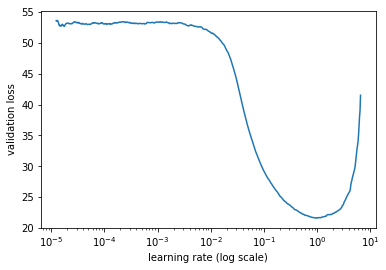

In [166]:
lrf=learn.lr_find()
learn.sched.plot()

In [164]:
lr = 0.1

In [413]:
learn.freeze()

In [415]:
learn.load('Clothing_anno_34')

In [174]:
learn.save('Clothing_anno_34')

In [ ]:
tmp = learn.predict()

In [ ]:
learn.fit(lr, 2, cycle_len=1, cycle_mult=2)

In [176]:
lrs = np.array([lr/25,lr/5,lr])

In [177]:
learn.freeze_to(-2)

In [178]:
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss                               
    0      14.664356  13.264693 
    1      14.234929  12.741564                              
    2      13.604065  12.322473                              


[array([12.32247])]

In [179]:
learn.save('Clothing_anno_34')

In [180]:
learn.freeze_to(-3)

In [15]:
data = get_data(256)

learn = ConvLearner.pretrained(f_model, data)

 97%|█████████▋| 638/659 [05:07<00:09,  2.17it/s, loss=79.9]

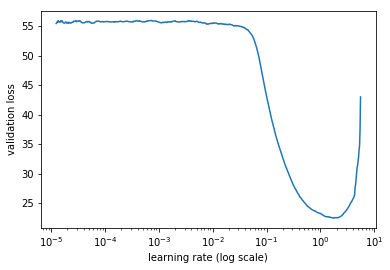

In [426]:
learn.lr_find()
learn.sched.plot()

In [39]:
lr =0.05

In [40]:
lrs = np.array([lr/36,lr/6,lr])

In [434]:
learn.freeze()

In [435]:
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss                               
    0      15.338247  14.284375 
    1      14.446334  12.891988                              
    2      13.908425  12.258446                              


[array([12.25845])]

In [436]:
learn.freeze_to(-2)

In [437]:
learn.save('256_clothing_1')

In [441]:
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss                               
    0      11.240402  9.4024    
    1      11.082629  8.817334                               
    2      10.131363  7.868922                               


[array([7.86892])]

In [446]:
learn.save('256_clothing_2')

In [16]:
learn.load('256_clothing_3')

In [17]:
learn.freeze_to(-3)

In [41]:
learn.fit(lrs, 2,cycle_mult=3)

epoch      trn_loss   val_loss                               
    0      10.005966  8.150766  
    1      9.487497   7.475274                               
    2      9.463624   7.698041                               
    3      9.479458   7.440918                               


[array([7.44092])]

In [45]:
learn.save('256_clothing_3.1')

In [ ]:
learn.fit(lrs, n_cycle=4,cycle_mult=5)

epoch      trn_loss   val_loss                               
    0      9.159346   7.415366  
 51%|█████     | 335/659 [09:04<09:02,  1.68s/it, loss=9.25]

In [ ]:
learn.save('256_clothing_more_3')

In [32]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

In [205]:
im = open_image('./data/clothes_retrieval/train/img_MEN_Denim_id_00000089_01_3_back.jpg')

In [27]:
def draw_lm(ax, points):
    patch = ax.add_patch(Circle((points[3],points[4]),2,color='white'))
    draw_outline(patch, 4)
    patch =     ax.add_patch(Circle((points[6],points[7]),2,color='white'))
    draw_outline(patch, 4)
    patch =     ax.add_patch(Circle((points[9],points[10]),2,color='white'))
    draw_outline(patch, 4)
    patch =     ax.add_patch(Circle((points[12],points[13]),2,color='white'))
    draw_outline(patch, 4)
    patch =     ax.add_patch(Circle((points[15],points[16]),2,color='white'))
    draw_outline(patch, 4)
    patch =     ax.add_patch(Circle((points[18],points[19]),2,color='white'))
    draw_outline(patch, 4)
    patch =     ax.add_patch(Circle((points[21],points[22]),2,color='white'))
    draw_outline(patch, 4)
    patch =     ax.add_patch(Circle((points[24],points[25]),2,color='white'))
    draw_outline(patch, 4)



In [28]:
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

In [34]:
x,y = next(iter(data.val_dl))
learn.model.eval()
preds = to_np(learn.model(VV(x)))

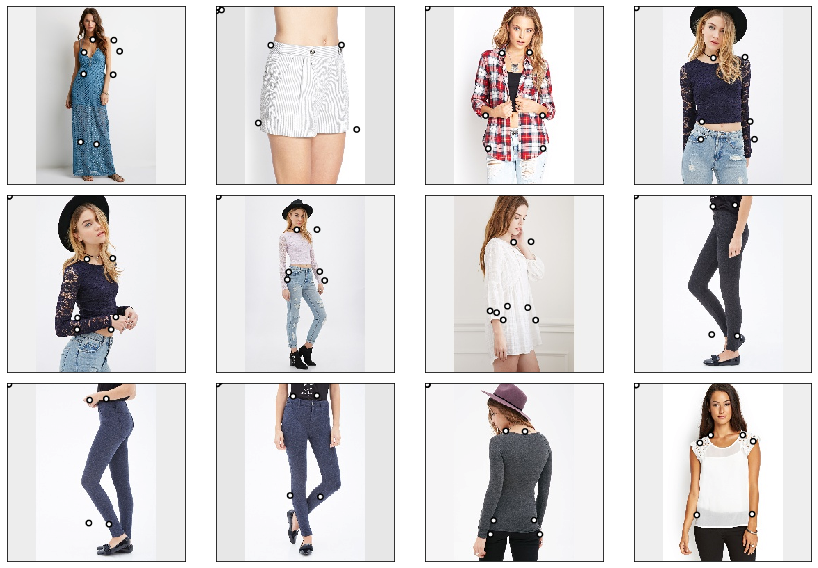

In [38]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=data.val_ds.denorm(x)[i+20]
    ax = show_img(ima, ax=ax)
    draw_lm(ax, preds[i+20])
plt.tight_layout()


In [ ]:
b = y[1]
ax = show_img(ima[1], ax=ax)
draw_lm(ax, b)